# UAS Pemprograman Data Analitik 2
# Anggota Kelompok :

* Bulan Kirana Subrata (41822010058)
* Septhania Maito Hutahaean (41822010114)
* Fira Nabilla (41822010129)
* Nadhira Sabina Putri (41822010150)


In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.


In [ ]:
import wfdb
import pandas as pd

# Download the database
wfdb.dl_database('mitdb', dl_dir='mitdb')

# Baca record (misal: 100)
record = wfdb.rdrecord('mitdb/100')
annotation = wfdb.rdann('mitdb/100', 'atr')

# Convert ke dataframe
df = pd.DataFrame(record.p_signal, columns=record.sig_name)
df['annotation_sample'] = 0
df.loc[annotation.sample, 'annotation_sample'] = 1

# Simpan sebagai CSV
df.to_csv('100.csv', index=False)

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

1
a. Load dan Konversi Data

In [ ]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt

record = wfdb.rdrecord('mitdb/100')
df = pd.DataFrame(record.p_signal, columns=record.sig_name)
df.to_csv('record_100.csv', index=False)

 b. Plot Sinyal Bersih vs Berderau

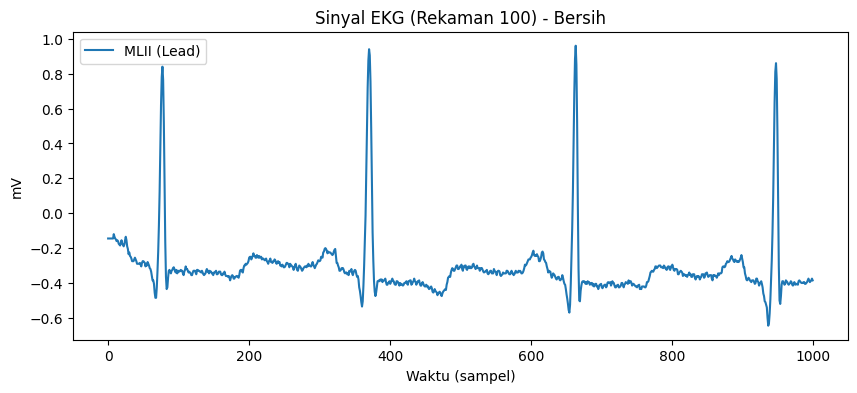

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df.iloc[0:1000, 0], label="MLII (Lead)")
plt.title('Sinyal EKG (Rekaman 100) - Bersih')
plt.xlabel('Waktu (sampel)')
plt.ylabel('mV')
plt.legend()
plt.show()

c. Analisis Frekuensi dengan FFT

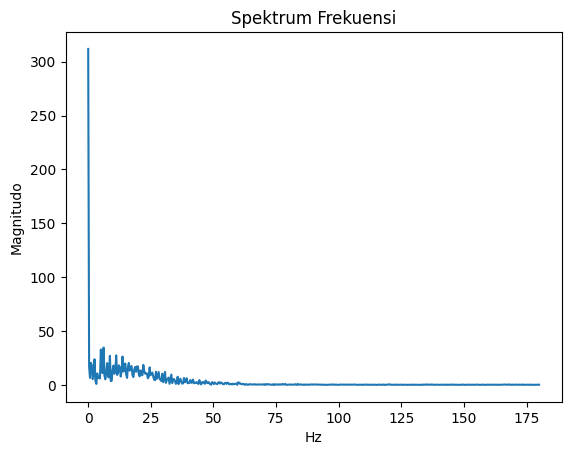

In [ ]:
from scipy.fft import fft
import numpy as np

signal = df.iloc[0:1000, 0]
fft_values = fft(signal)
frequencies = np.linspace(0, 360/2, len(fft_values)//2)

plt.plot(frequencies, np.abs(fft_values[:len(frequencies)]))
plt.title("Spektrum Frekuensi")
plt.xlabel("Hz")
plt.ylabel("Magnitudo")
plt.show()

d. Statistik Dasar

In [ ]:
print(df.describe())


                MLII             V5
count  650000.000000  650000.000000
mean       -0.306299      -0.191034
std         0.193200       0.148213
min        -2.715000      -2.465000
25%        -0.390000      -0.265000
50%        -0.335000      -0.205000
75%        -0.270000      -0.145000
max         1.435000       1.225000
